In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def process_csv(csv_file):
    # Load CSV into a pandas DataFrame
    df = pd.read_csv(csv_file)

    # Identify all keys
    keys = df[['INT_EPS', 'LEAF_EPS', 'LEAF_BUFSIZE', 'LEAF_FILL_DEC', 'LEAF_SPLIT_DEC']].drop_duplicates().values.tolist()

    # Initialize a dictionary to store statistics for each key
    key_stats = {}

    # Iterate over keys
    for key in keys:
        # Filter DataFrame for current key
        key_df = df[(df['INT_EPS'] == key[0]) & 
                    (df['LEAF_EPS'] == key[1]) & 
                    (df['LEAF_BUFSIZE'] == key[2]) & 
                    (df['LEAF_FILL_DEC'] == key[3]) & 
                    (df['LEAF_SPLIT_DEC'] == key[4])]

        # Calculate statistics for each column
        stats = {
            'initial_size': (key_df['initial_size'].mean(), key_df['initial_size'].min(), key_df['initial_size'].max()),
            'build_time': (key_df['build_time'].mean(), key_df['build_time'].min(), key_df['build_time'].max()),
            'upsert_time': (key_df['upsert_time'].mean(), key_df['upsert_time'].min(), key_df['upsert_time'].max()),
            'read_time': (key_df['read_time'].mean(), key_df['read_time'].min(), key_df['read_time'].max()),
            'final_size': (key_df['final_size'].mean(), key_df['final_size'].min(), key_df['final_size'].max())
        }

        # Store statistics in dictionary
        key_stats[tuple(key)] = stats

    return key_stats

In [3]:
def process_multiple_csv(csv_files):
    # Initialize a list to store key stats dictionaries for each file
    all_key_stats = []

    # Process each CSV file
    for csv_file in csv_files:
        key_stats = process_csv(csv_file)
        all_key_stats.append(key_stats)

    # Initialize a dictionary to store aggregated key stats
    aggregated_stats = {}

    # Iterate over all key stats dictionaries
    for key_stats in all_key_stats:
        # Iterate over keys in each key stats dictionary
        for key, stats in key_stats.items():
            # Check if the key already exists in the aggregated stats dictionary
            if key not in aggregated_stats:
                # If not, initialize inner dictionary for each key
                aggregated_stats[key] = {
                    'initial_size': {
                        'mean': [],
                        'min': [],
                        'max': [],
                    },
                    'build_time': {
                        'mean': [],
                        'min': [],
                        'max': [],
                    },
                    'upsert_time': {
                        'mean': [],
                        'min': [],
                        'max': [],
                    },
                    'read_time': {
                        'mean': [],
                        'min': [],
                        'max': [],
                    },
                    'final_size': {
                        'mean': [],
                        'min': [],
                        'max': [],
                    }
                }
            
            # Append values to the corresponding lists
            for column, (mean, min_val, max_val) in stats.items():
                aggregated_stats[key][column]['mean'].append(mean)
                aggregated_stats[key][column]['min'].append(min_val)
                aggregated_stats[key][column]['max'].append(max_val)

    return aggregated_stats

In [4]:
def plot_data(big_dict, key_to_readable, select_function, xs, xlabel, ylabel, title):
    for key, stats in big_dict.items():
        readable_key = key_to_readable.get(key, str(key))
        x = xs
        y = select_function(stats)
        plt.plot(x, y, label=readable_key)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)  # You may need to adjust this label
    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
csv_files = [
    '../../data/NewInitialExperiment1e6.csv',
    '../../data/NewInitialExperiment2e6.csv',
    '../../data/NewInitialExperiment3e6.csv',
    '../../data/NewInitialExperiment4e6.csv',
    '../../data/NewInitialExperiment5e6.csv',
    '../../data/NewInitialExperiment6e6.csv',
    '../../data/NewInitialExperiment7e6.csv',
    '../../data/NewInitialExperiment8e6.csv',
    '../../data/NewInitialExperiment9e6.csv',
    '../../data/NewInitialExperiment10e6.csv',
]
aggregated_key_stats = process_multiple_csv(csv_files)

# Print aggregated key stats
for key, stats in aggregated_key_stats.items():
    print("Key:", key)
    for stat_type, values in stats.items():
        print(f"\t{stat_type}: {values}")

Key: (4, 64, 64, 5, 8)
	initial_size: {'mean': [20133017.0, 20135130.0, 30192943.0, 40259866.0, 50331342.0, 60409909.0, 70477723.0, 80541917.0, 90605940.0, 100683320.0], 'min': [20133017, 20135130, 30192943, 40259866, 50331342, 60409909, 70477723, 80541917, 90605940, 100683320], 'max': [20133017, 20135130, 30192943, 40259866, 50331342, 60409909, 70477723, 80541917, 90605940, 100683320]}
	build_time: {'mean': [208001.0, 215464.33333333334, 310636.6666666667, 407662.3333333333, 504465.0, 618157.0, 706013.3333333334, 803014.3333333334, 911921.6666666666, 1018288.3333333334], 'min': [197706, 212345, 305898, 398721, 493498, 593748, 678777, 765939, 891836, 942482], 'max': [225687, 220723, 318707, 413167, 510783, 639688, 727502, 831150, 924543, 1080144]}
	upsert_time: {'mean': [3312014.0, 3308909.3333333335, 6252808.0, 6661147.333333333, 9620924.333333334, 11076493.666666666, 14719214.0, 14959183.666666666, 20279546.0, 19828569.666666668], 'min': [3138129, 3281653, 6240468, 6398302, 9607492, 

In [9]:
key_to_readable = {
    (4, 64, 64, 5, 8): "Buffer, Empty Space",
    (4, 64, 64, 9, 10): "Buffer, No Empty Space",
    (4, 64, 0, 5, 8): "No Buffer, Empty Space",
    (4, 64, 0, 9, 10): "No Buffer, No Empty Space"
}

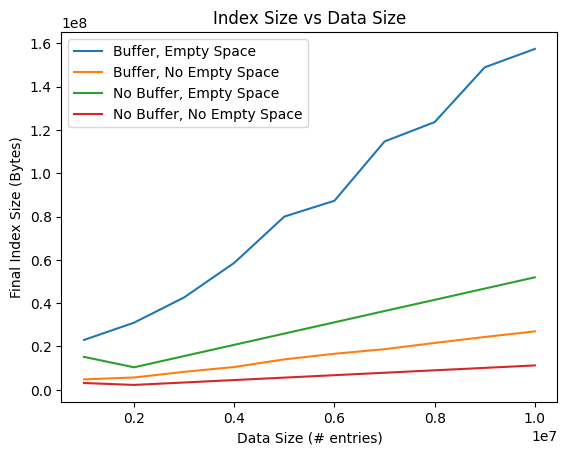

In [10]:
def select_final_size_mean(stats):
    return stats['final_size']['mean']

xs = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6, 10e6]
plot_data(aggregated_key_stats, key_to_readable, select_final_size_mean, xs, "Data Size (# entries)", "Final Index Size (Bytes)", "Index Size vs Data Size")

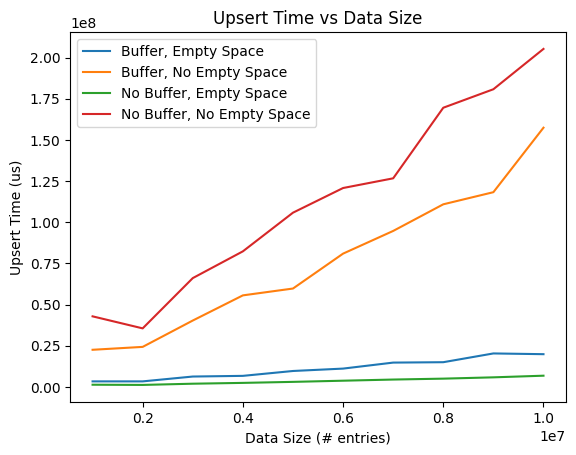

In [11]:
def select_upsert_time(stats):
    return stats['upsert_time']['mean']

xs = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6, 10e6]
plot_data(aggregated_key_stats, key_to_readable, select_upsert_time, xs, "Data Size (# entries)", "Upsert Time (us)", "Upsert Time vs Data Size")

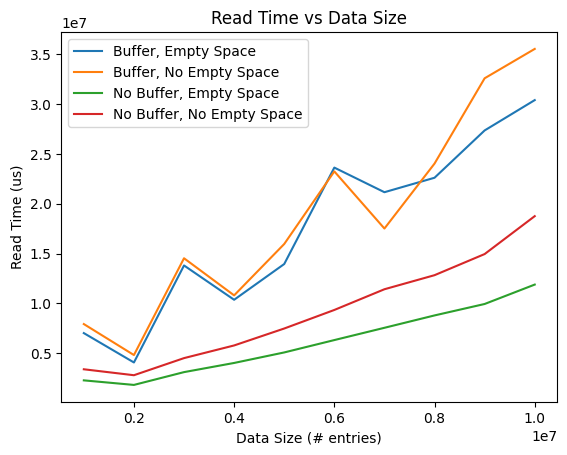

In [13]:
def select_read_time(stats):
    return stats['read_time']['mean']

xs = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6, 10e6]
plot_data(aggregated_key_stats, key_to_readable, select_read_time, xs, "Data Size (# entries)", "Read Time (us)", "Read Time vs Data Size")

In [ ]:
csv_files = [
    '../../data/InitialExperiment1e6.csv',
    '../../data/InitialExperiment2e6.csv',
    '../../data/InitialExperiment3e6.csv',
    '../../data/InitialExperiment4e6.csv',
    '../../data/InitialExperiment5e6.csv',
    '../../data/InitialExperiment6e6.csv',
    '../../data/InitialExperiment7e6.csv',
    '../../data/InitialExperiment8e6.csv',
    '../../data/InitialExperiment9e6.csv',
]
aggregated_key_stats = process_multiple_csv(csv_files)

# Print aggregated key stats
for key, stats in aggregated_key_stats.items():
    print("Key:", key)
    for stat_type, values in stats.items():
        print(f"\t{stat_type}: {values}")

In [ ]:
key_to_readable = {
    (8, 64, 128, 5, 8): "Buffer, Empty Space",
    (8, 64, 128, 9, 10): "Buffer, No Empty Space",
    (8, 64, 0, 5, 8): "No Buffer, Empty Space",
    (8, 64, 0, 9, 10): "No Buffer, No Empty Space"
}